In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")


# Set figure parameters
fig_width = 3.25 #ECS spec is 3.25" width
fig_width_2col_inches = 7
fig_width_3col_inches = 10
fig_height = (3/4)*fig_width # standard ratio

rcParams['figure.autolayout'] = True
rcParams['lines.linewidth'] = 1.0
rcParams['font.size'] = 8
rcParams['font.sans-serif'] = 'Arial'
rcParams['mathtext.fontset'] = 'custom'
rcParams['mathtext.rm'] = 'Arial'
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42

rcParams['lines.markersize'] = 5
rcParams['legend.fontsize'] = 7
rcParams['legend.frameon'] = False
rcParams['xtick.bottom'] = False
rcParams['ytick.direction'] = 'in' 


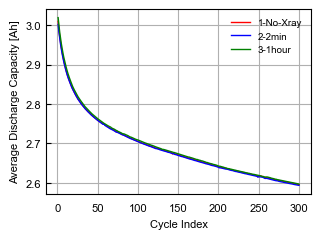

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 현재 파이썬 스크립트 위치 기준으로 '500 cyc' 폴더 경로 설정
base_folder_path = os.path.join(os.getcwd(), '500 cyc')

# Define the folders (subfolders within '500 cyc')
folders = ['1-No-Xray', '2-2min', '3-1hour']
colors = ['red', 'blue', 'green']  # Colors for each folder

# Function to filter data
def filter_data(df):
    filtered_df = df[df['Cycle Index'] > -1]
    filtered_df.reset_index(drop=True, inplace=True)
    return filtered_df

# Initialize a figure
fig, ax = plt.subplots(figsize=(fig_width, fig_height))

for folder, color in zip(folders, colors):
    # 폴더 경로 설정
    folder_path = os.path.join(base_folder_path, folder)
    
    # List all Excel files in the folder
    files = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]
    files_sort = sorted(files)
    
    # Initialize a DataFrame to collect all data
    all_data = pd.DataFrame()
    
    for file in files_sort:
        file_path = os.path.join(folder_path, file)
        # Read the Excel file
        df = pd.read_excel(file_path, header=0, sheet_name='cycle')
        filtered_df = filter_data(df)
        
        all_data = pd.concat([all_data, filtered_df], ignore_index=True)
    
    # Calculate the mean DChg. Cap.(Ah) for each Cycle Index
    mean_data = all_data.groupby('Cycle Index')['DChg. Cap.(Ah)'].mean().reset_index()
    
    # Plot the mean data
    plt.plot(mean_data['Cycle Index'], mean_data['DChg. Cap.(Ah)'], color=color, label=folder)

# Adjust plot settings
ax.set_xlabel('Cycle Index')  # X축 타이틀
ax.set_ylabel('Average Discharge Capacity [Ah]')  # Y축 타이틀

ax.grid()
ax.legend()  # 레전드를 추가

# 플롯을 표시
plt.show()